# 1. 지점별 전체 환불 비율

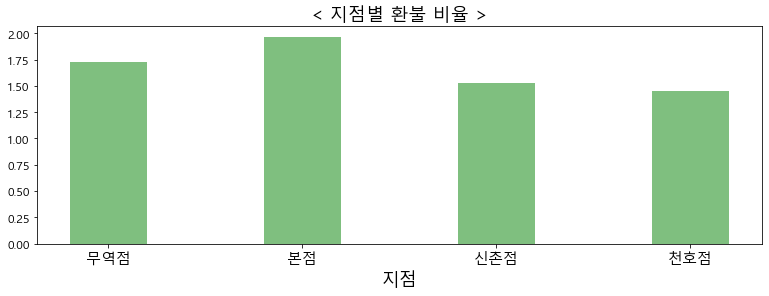

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')
# train

#환불 내역
train_refund = train[train['amount']<0]
# train_refund

#고객당 환불 내역
# train_refund1 = train.groupby(train[train['amount']<0]["custid"]).count()
# train_refund1

# 지점별 구매 내역
train_buy1 = train.groupby("store").count()
# train_buy1

#지점별 환불 내역
train_refund1 = train_refund.groupby("store").count()
#train_refund1


#지점별 환불 비율
a = train_refund1["custid"]/train_buy1["custid"].sum()*100
# a

#막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = a.index       # x축 항목
y = train_refund1["custid"]/train_buy1["custid"].sum()*100   # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('지점',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 지점별 환불 비율 >',fontsize=18)  # 그래프 제목
plt.show()

# 2. 브랜드별 환불 TOP5 

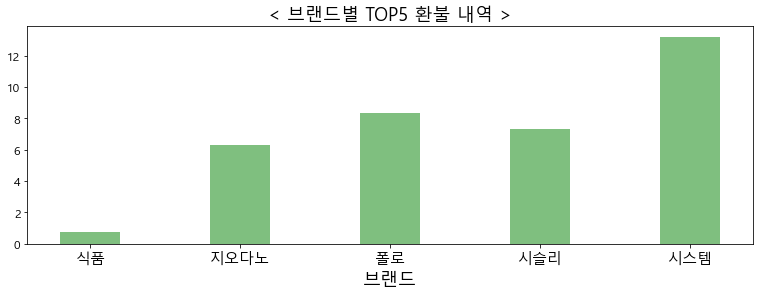

In [4]:
#라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')
# train

#환불 내역
train_refund = train[train["amount"]<0]

# 브랜드별 환불 횟수
a1 = train_refund.groupby("brand").count()
# a1

# 환불 횟수 TOP5 추출
a_1 = a1.sort_values('amount', ascending=False).head(5)
# a_1

# 브랜드별 거래 횟수
a2 = train.groupby("brand").count()
# a2

# 브랜드별 거래 횟수 오름차순 정리
a_2 = a2.sort_values('amount', ascending=False)
# a_2

# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
# a_2 = a_2.reset_index(level=['brand']) # 컬럼으로 다시 전환
a_3 = a_2.loc[["식품","지오다노","폴로","시슬리","시스템"]]
# a_3

#브랜드별 환불 비율
s1 = a_1["custid"]/a_3["custid"]

#막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = a_1.index       # x축 항목
y = s1 *100 #s1 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 브랜드별 TOP5 환불 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()



# 3. 본점 환불 브랜드 TOP5

brand
식품      0.005874
폴로      0.085340
지오다노    0.061835
시슬리     0.076497
올리비에    0.134367
Name: custid, dtype: float64


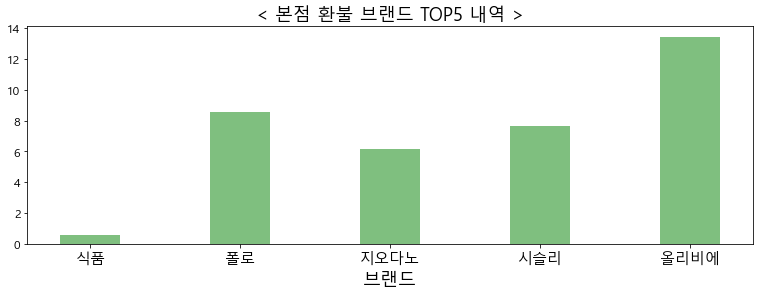

In [14]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')

# 본점 데이터만 가져오기
h_1 = train[train["store"] == "본점"]
# h_1

# 본점 브랜드별 거래량
h_2 = h_1.groupby("brand").count()
# h_2

# 환불 내역
train_refund = h_1[h_1["amount"]<0]
# train_refund

# 환불 브랜드
h_3 = train_refund.groupby("brand").count()
# h_3

# 환불 브랜드 top5
h_4 = h_3.sort_values('amount', ascending=False).head(5)
# h_4

# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
h_5 = h_2.loc[["식품","폴로","지오다노","시슬리","올리비에"]]
# h_5

s2 = h_4["custid"]/h_5["custid"]
print(s2)

# 막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = h_4.index       # x축 항목
y = s2 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 본점 환불 브랜드 TOP5 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()

# 4. 무역점 환불 브랜드 TOP5

brand
밀라노스토리무역    0.133749
시스템         0.127313
식품          0.006847
지오다노        0.055261
폴로          0.078872
Name: custid, dtype: float64


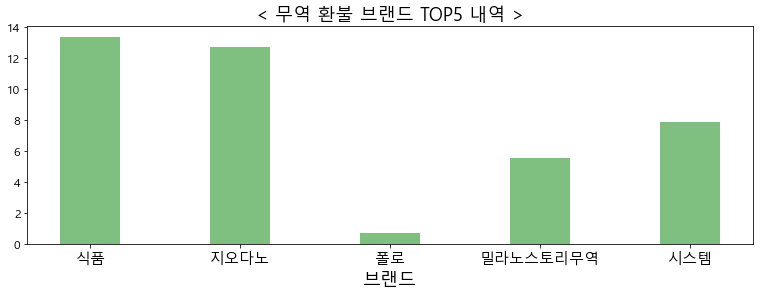

In [25]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')

# 무역점 데이터만 가져오기
m_1 = train[train["store"] == "무역점"]
# m_1

# 무역 브랜드별 거래량
m_2 = m_1.groupby("brand").count()
# m_2

# 환불 내역
train_refund = m_1[m_1["amount"]<0]
# train_refund

# 환불 브랜드
m_3 = train_refund.groupby("brand").count()
# m_3

# 환불 브랜드 top5
m_4 = m_3.sort_values('amount', ascending=False).head(5)
# m_4

# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
m_5 = m_2.loc[["식품","폴로","지오다노","밀라노스토리무역","시스템"]]
# m_5

s3 = m_4["custid"]/m_5["custid"]
print(s3)

# 막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = m_4.index       # x축 항목
y = s3 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 무역 환불 브랜드 TOP5 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()

# 5. 신촌점 환불 브랜드 TOP5

brand
식품       0.008525
지오다노     0.060692
에스티로더    0.053714
밀라노신촌    0.140488
크리니크     0.045085
Name: custid, dtype: float64


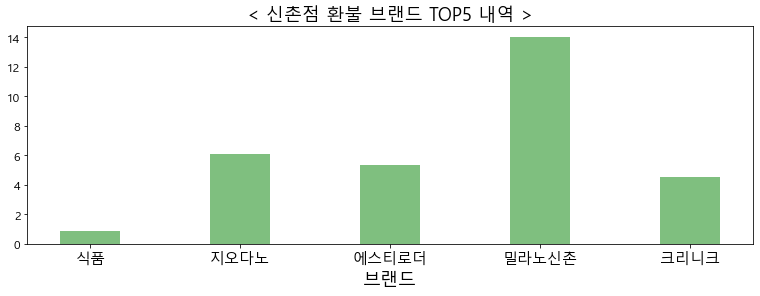

In [2]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')
train["brand"] = train["brand"].apply(lambda x: x.replace(' ', ''))

# 신촌점 데이터만 가져오기
sh_1 = train[train["store"] == "신촌점"]
# sh_1

# 신촌 브랜드별 거래량
sh_2 = sh_1.groupby("brand").count()
# sh_2

# 환불 내역
train_refund = sh_1[sh_1["amount"]<0]
# train_refund

# 환불 브랜드
sh_3 = train_refund.groupby("brand").count()
# sh_3

# 환불 브랜드 top5
sh_4 = sh_3.sort_values('amount', ascending=False).head(5)
# sh_4

# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
sh_5 = sh_2.loc[["식품","지오다노","에스티로더","밀라노신촌","크리니크"]]
# sh_5

s4 = sh_4["custid"]/sh_5["custid"]
print(s4)

# 막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = sh_4.index       # x축 항목
y = s4 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 신촌점 환불 브랜드 TOP5 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()

# 6. 천호점 환불 브랜드 TOP5

brand
식품        0.010157
지오다노      0.077567
피에르가르뎅    0.109883
NII       0.095208
시슬리       0.093977
Name: custid, dtype: float64


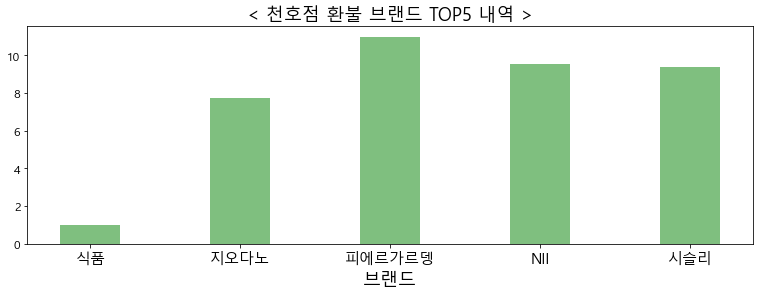

In [5]:
 #라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('train.csv', encoding='cp949')
train["brand"] = train["brand"].apply(lambda x: x.replace(' ', ''))

# 천호점 데이터만 가져오기
ch_1 = train[train["store"] == "천호점"]
# ch_1

# 천호 브랜드별 거래량
ch_2 = ch_1.groupby("brand").count()
# ch_2

# 환불 내역
train_refund = ch_1[ch_1["amount"]<0]
# train_refund

# 환불 브랜드
ch_3 = train_refund.groupby("brand").count()
# ch_3

# 환불 브랜드 top5
ch_4 = ch_3.sort_values('amount', ascending=False).head(5)
# ch_4

# 전체 브랜드에서 환불 TOP5와 동일한 브랜드 추출
ch_5 = ch_2.loc[["식품","지오다노","피에르가르뎅","NII","시슬리"]]
# ch_5

s5 = ch_4["custid"]/ch_5["custid"]
print(s5)

# 막대 그래프로 시각화
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x = ch_4.index       # x축 항목
y = s5 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('브랜드',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 천호점 환불 브랜드 TOP5 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()